# Wholesale Customers | Segmentation

### Problem

**In this practice, we are exploring EDA, Supervised and unsupervised learnig.**

**Dataset : https://archive.ics.uci.edu/ml/datasets/Wholesale+customers**

### Team

* [Ankur Rokad](https://github.com/ankurrokad)
* [Sahista Patel](https://github.com/Sahista-Patel)
* [Murali Krishna](https://github.com/muralikrishnarar)
* [Gursanjam Kaur](https://github.com/sv2021)

In [1]:
#Data handling Imports
import pandas as pd 
import numpy as np

#Notebook arrange Imports
import warnings
warnings.filterwarnings('ignore')

#Calculation Imports
import math
import random

#Visualisation Imports
import seaborn as sns
import pylab
pylab.style.use('seaborn-pastel')
import matplotlib.pyplot as plt
%matplotlib inline

#Feature Selection Imports
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

#Outlier Handling Imports
from scipy.stats.mstats import winsorize

#Normalization & Scaler Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.decomposition import PCA

#Sampling Imports
from sklearn.model_selection import KFold

#Encoding Imports
from sklearn.preprocessing import LabelEncoder

#Modeling Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Clustering Imports
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import scipy.cluster.hierarchy as shc

#Accuracy Validation Imports
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score,precision_recall_curve,\
confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

#Other required libraries
import time
start = time. time()

# [1] Data preprocessing

**Abstract**<br>
<i>The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.</i><br><br>
**Data Source**<br> 
UCI Machine Learning Repository<br><br>
**Origin**<br>
Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers<br><br>
**Attribute Information**
1) FRESH: annual spending (m.u.) on fresh products (Continuous); <br>
2) MILK: annual spending (m.u.) on milk products (Continuous);<br>
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);<br>
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)<br>
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br>
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);<br>
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)<br>
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)<br>

**Purpose**<br>
<i>Data preprocessing, visualization and using Supervised & Unsupervised learning model to discover different segments of customers.</i><br><br>

### a) Load the data set into a data frame  

In [2]:
#Loading dataset from UCI repository using URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
# column_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen','Channel','Region']
# df = pd.read_csv(url,names=column_names)
df = pd.read_csv(url)
#Taking copy for missing value handling purpose
df_MV = df.copy()
# df.head()
df_MV.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
44,2,3,9670,7027,10471,541,4618,65
413,1,3,4983,4859,6633,17866,912,2435
396,2,3,4515,11991,9345,2644,3378,2213
225,1,1,12680,3243,4157,660,761,786
173,2,3,514,7677,19805,937,9836,716


In [3]:
#Checking the size of the dataset
df_MV.shape

(440, 8)

### b) Are there any missing values in the dataset? How to handle that 

In [4]:
#Checking for missing values
df_MV.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#As we don't have any missing values in dataset . checking structure to put sunthetic nulls
df_MV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#Count of unique values and categories featurewise for Channel & Region Column
column_list = ['Channel','Region']
#print(column_list)
for col in column_list:
    print('Feature: {:<9s} | Unique-Count: {:<3} | Categories: {:}'.format(col,df_MV[col].nunique(),df_MV[col].unique()))

Feature: Channel   | Unique-Count: 2   | Categories: [2 1]
Feature: Region    | Unique-Count: 3   | Categories: [3 1 2]


In [7]:
#As dataset is not having any null values imputing null values to explain importance of preprocessing of null value handling
#Inserting 3% of each column's values as null... [Synthetic]
#As we have only 440 records.. doesn't want to distort..
ix = [(row, col) for row in range(df_MV.shape[0]) for col in range(df_MV.shape[1])]
for row, col in random.sample(ix, int(round(.03*len(ix)))):
    df_MV.iat[row, col] = None

In [8]:
#Checking null values after synthetic null insert
df_MV.isnull().sum().sort_values(ascending=False)

Fresh               20
Milk                17
Detergents_Paper    14
Grocery             13
Channel             13
Delicassen          11
Frozen              11
Region               7
dtype: int64

<u>**5 Ways to Handle Missing Values**</u><br><br>
**1.Deleting Rows:**<i> Only 440 rows deletion will cause data-loss. 8 features deletion of higher null value feature will add bias. This won't help.</i><br>
**2.Replacing With Mean/Median/Mode/Interpolate:**<i> This can help here as spending on product can be in range. </i><br>
**3.Assigning An Unique Category:**<i> Dataset doesn't have unique categories except region & Channel.. Adding new category make sense here as 2 and 3 unique value respectively value as new '4' as new region and channel can be added.</i><br>
**4.Predicting The Missing Values:**<i> Using ML algorithm predict won't help here as with 440 rows still making our ready for fitting into model. </i> <br>
**5.Using Algorithms Which Support Missing Values:**<i> Here we are going for Clustering & Classification already. For null values it won't be suitable. </i> 

In [9]:
#Assigning unique category to region & Channel feature as '3' & '4' recpectively. For null handling
df_MV['Channel'] = df_MV['Channel'].fillna(3)
df_MV['Region'] = df_MV['Region'].fillna(4)
df_MV.isnull().sum().sort_values(ascending=False)

Fresh               20
Milk                17
Detergents_Paper    14
Grocery             13
Delicassen          11
Frozen              11
Region               0
Channel              0
dtype: int64

In [10]:
#For rest null value imputation let's check insight of data
df_MV.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,420.000000,423.000000,427.000000,429.000000,426.000000,429.000000
mean,1.365909,2.565909,12100.007143,5825.617021,8020.782201,3020.321678,2846.091549,1539.869464
std,0.540161,0.790157,12796.769131,7479.511041,9556.544643,4839.238858,4693.486368,2851.903359
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3151.750000,1520.500000,2156.000000,688.000000,255.250000,411.000000
50%,1.000000,3.000000,8504.000000,3620.000000,4910.000000,1492.000000,816.500000,975.000000
75%,2.000000,3.000000,16933.750000,7196.500000,10747.000000,3527.000000,3904.500000,1827.000000
max,3.000000,4.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
#Median and Mean by grouping cannel & region
df_MVal = df_MV.drop(['Channel','Region'], axis=1)
df_MV.groupby(['Channel', 'Region']).agg(['median','mean']).round(1)

Fresh             Milk           Grocery           Frozen  \
                 median     mean  median     mean   median     mean  median   
Channel Region                                                                
1.0     1.0      8645.5  12827.9  2280.0   3672.9   2700.0   4077.2  1859.0   
        2.0      9790.0  11946.4  1511.0   2301.7   3389.0   4453.0  2879.5   
        3.0      9602.0  13745.3  2306.0   3581.5   2645.0   3929.3  1870.5   
        4.0     10379.0  14247.3  3648.0   7665.7   4748.0   5037.3   830.0   
2.0     1.0      2665.5   4914.4  8866.0  10784.0  16106.0  18471.9  1522.0   
        2.0      6468.0   6384.6  6530.0   9167.8  13018.0  16689.7  1031.0   
        3.0      7209.5   9923.5  7845.0  11234.8  12394.0  16343.4  1062.5   
        4.0      5232.5   5141.5  5396.5   6002.0   9605.5   8857.0   749.5   
3.0     1.0      7291.0   7291.0  1012.0   1012.0   2062.0   2062.0  1291.0   
        2.0     17327.0  17327.0  2374.0   2374.0   2842.0   2842.0  1149.0   
        3.0     14155.0  19658.7  6343.0   8119.6   9670.0  10384.0   596.0   

                       Detergents_Paper         Delicassen          
                  mean           median    mean     median    mean  
Channel Region                                                      
1.0     1.0     3132.2            409.0   962.0      749.0  1185.0  
        2.0     6039.7            294.5   489.3      851.0  1096.4  
        3.0     3521.9            375.0   791.0      833.0  1554.8  
        4.0     1980.3           1547.0  1403.7     1218.0  1744.3  
2.0     1.0     2584.1           5980.0  7926.3     1510.5  2010.8  
        2.0     1605.9           6399.0  8531.1     1069.5  1277.0  
        3.0     1586.3           5611.0  6977.1     1339.0  1818.6  
        4.0      883.0           3780.0  3897.8     1003.0  1252.0  
3.0     1.0     1291.0            240.0   240.0     1775.0  1775.0  
        2.0     1149.0            351.0   351.0      925.0   925.0  
        3.0     2333.9           3881.0  4161.4     1318.5  1535.8

In [12]:
#As per above we can easily understood filling by mean is optimal as grouping with Channel & Region won't help here.
#Vast difference between median and mean
df_MV.fillna(df_MV.mean(), inplace=True)
df_MV.isnull().sum().sort_values(ascending=False)

Delicassen          0
Detergents_Paper    0
Frozen              0
Grocery             0
Milk                0
Fresh               0
Region              0
Channel             0
dtype: int64

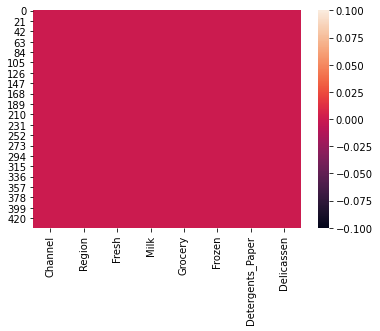

In [13]:
#Null heatmap to visualize the dataset
sns.heatmap(df.isnull())

As per above. Null values can be imputed.

### c) Use feature selection and pruning techniques.

<u>**Two Ways For Feature Selection**</u><br><br>
**1.Unsupervised:**<i> Using Correlation and removing redundant variables. We don't have any redundant variable here.</i><br>
**2.Supervised:**<i> Removing irrelevant variables.Region & Channel seems irrelevant here. </i><br>
<i>Wrapper [RFE], Filter-relationship with targetvarible [Statistical Methods, Feature Importance Methods], Intrinsic [Decision Trees]. Here, we are clustering & classifying segments, none defined target variables, so this method won't help.</i>

Text(0.5, 1.0, 'Correlation')

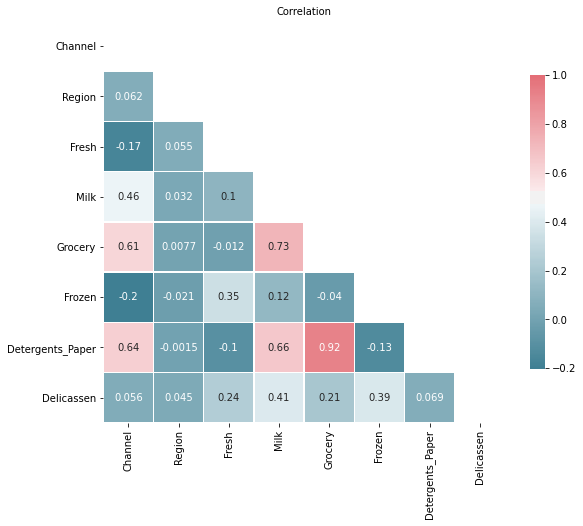

In [14]:
#Checking the correlation 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)
plt.title("Correlation", fontsize =10)

**Using SelectKBest**

In [15]:
#Target variable 'Channel'. let's see other feature selection techniques.
X = df.drop('Channel', axis=1)
y = df['Channel']

# Apply SelectKBest Algorithm using chi2 score function
kbest_features = SelectKBest(score_func=chi2, k=6)
ord_features = kbest_features.fit(X, y)
df_scores = pd.DataFrame(ord_features.scores_, columns=["Score"])
df_columns = pd.DataFrame(X.columns)
k_features = pd.concat([df_columns, df_scores], axis=1)
k_features.columns=['Features','Score']
k_features

,Features,Score
0,Region,3.981484e-01
1,Fresh,1.674662e+05
2,Milk,8.756852e+05
3,Grocery,1.848001e+06
4,Frozen,1.374907e+05
5,Detergents_Paper,1.401016e+06
6,Delicassen,7.183162e+03


**Using ExtraTreesClassifier**

In [16]:
# Lets try an ensemble model to find the top features in our dataset
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.02155864 0.06310808 0.15476534 0.25024993 0.07543336 0.37836188
 0.05652277]


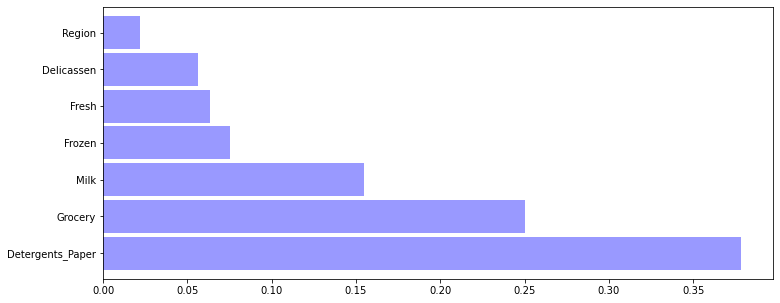

In [17]:
# Finding the top ranked fetures and plotting
ranked_features = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize=(12, 5))
ranked_features.nlargest(15).plot(kind='barh', color='blue',  width =0.9 , linewidth = 0.05, alpha=0.4)
plt.show()

**Using Mutual_info_classif**

It estimates mutual information for a discrete target variable between two random variables which is a non-negative value, 
which measures the mutual information between a matrix containing a set of feature vectors and the target.

It is equal to zero if and only if two random variables are dependent, and higher values mean higher dependency.

In [18]:
#the sorted values of mean higer score
mutual_info = mutual_info_classif(X, y)
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values(ascending=False)

Detergents_Paper    0.406937
Grocery             0.340855
Milk                0.217988
Delicassen          0.017781
Frozen              0.015268
Fresh               0.000000
Region              0.000000
dtype: float64

**Using GenericUnivariateSelect** <br> It works by selecting the best features based on univariate statistical tests and allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.Select KBest removes all but the  highest scoring features.Select Percentile removes all but a user-specified highest scoring percentage of features.<br>
In our dataset only 7 independent features, let see how many relevent here.

In [19]:
#Let's encode and select the best features

label_encoder = LabelEncoder()
df_1 = df.apply(label_encoder.fit_transform)
# X_feature = df.drop('Channel', axis=1)
# Y_label = df['Channel']
X = df_1.drop('Channel', axis=1)
Y = df_1['Channel']


#trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=15)
trans = GenericUnivariateSelect(score_func = mutual_info_classif, mode='percentile', param = 70)
trans_feat = trans.fit_transform(X, Y)
columns_ = df_1.iloc[:, 1:].columns[trans.get_support()].values

# X_feature as tranformed top feature variables
X_feature = pd.DataFrame(trans_feat, columns=columns_)

# Y_label with only target variable
Y_label = Y

X_feature.columns

Index(['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

# [2] Data visualization

Let's start exploring data
1. Univariate analysis [Each feature individually]
2. Bivariate analysis [Pairwise]

### - Use Data visualization techniques to plot in graphs

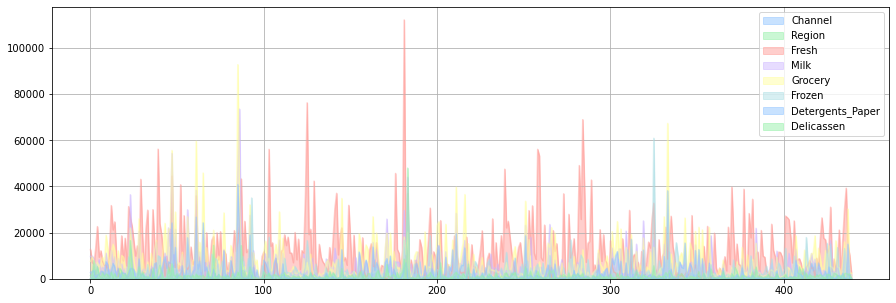

In [20]:
#1. Univariate analysis [Each feature individually]
#Plotting all features stacked
df.plot.area(stacked=False,figsize=(15,5))
pylab.grid(); pylab.show()

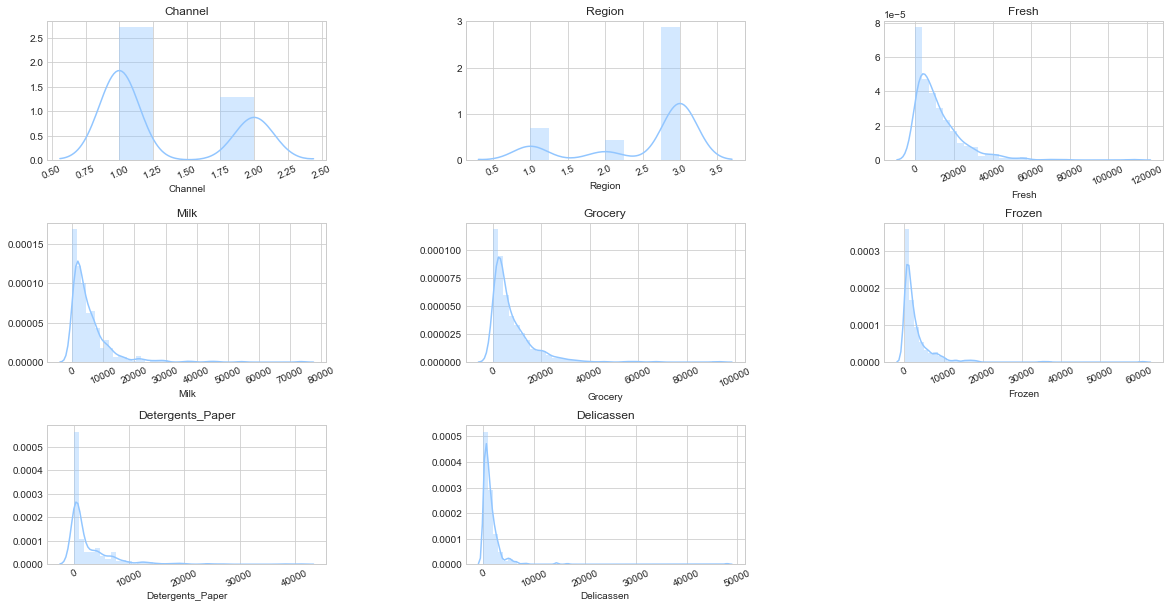

In [21]:
#Histplot for eac feature
def plot_draw(df, cols=5, width=10, height=10, hspace=0.2, wspace=0.5):
    """Ploting the individual feature histplot"""
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
    
plot_draw(df, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)

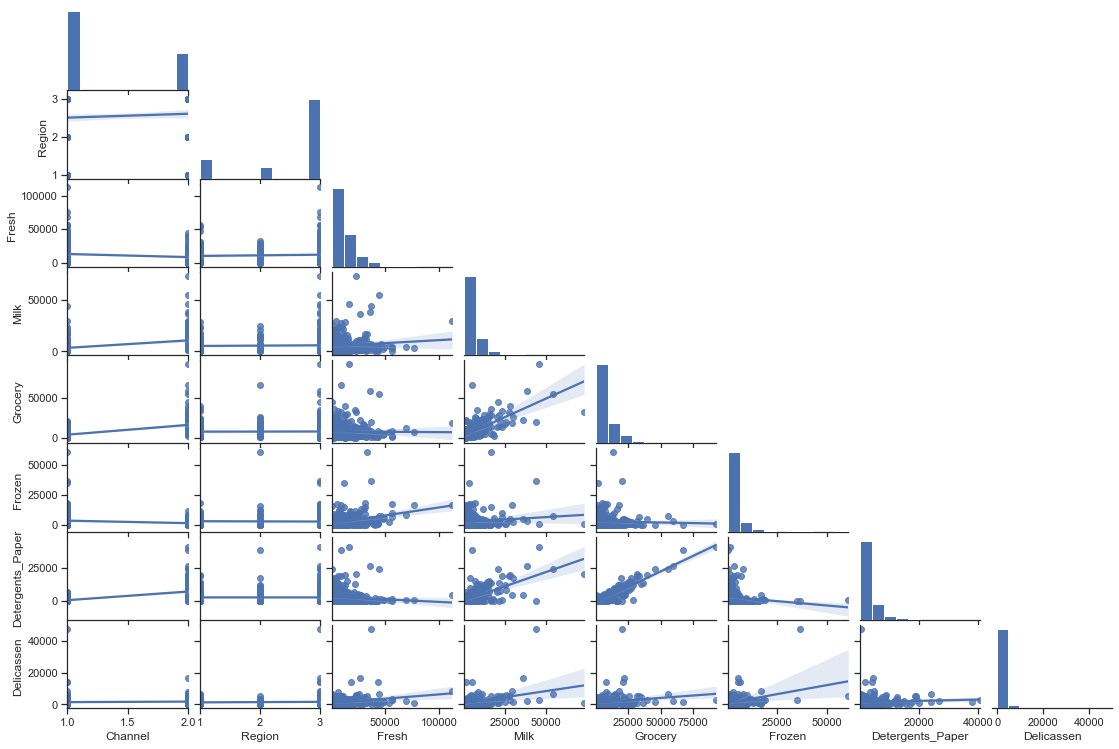

In [22]:
#2. Bivariate analysis [Pairwise]
#This is not needed for our dataset perspective but for visulization purpose let's plot
sns.set(style="ticks")
graph = sns.pairplot(df,corner=True,kind='reg')
graph.fig.set_size_inches(15,10)

### - Use a measure of central tendency for each feature

In [23]:
#Let's check central tendency for each feature
df.agg(['median','mean','std']).round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
median,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11


### - Show the dispersion (standard deviation and IQR) of features

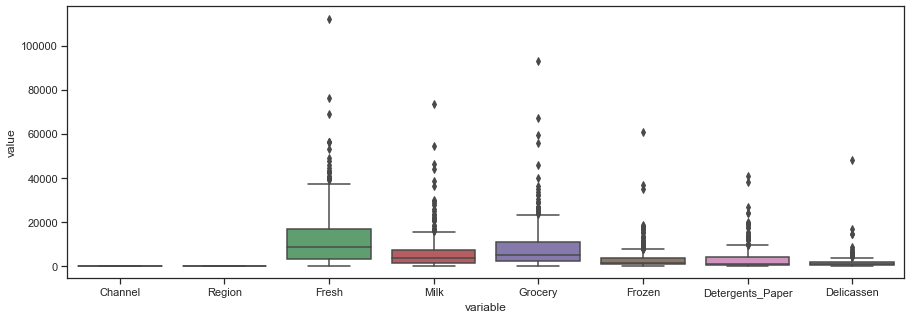

In [24]:
#Plotting box plots for outliers, std values shown above
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='value', data=df.melt())
plt.show()

In [25]:
#Outlier detection, measure in percentage
num_col = df.columns.tolist()
#Function to detect the outliers using IQR
def outlier_count(col, data=df):
    #q75, q25 = np.percentile(data[col], [25, 75])
    # calculate the interquartile range(Q1,Q3)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - (IQR*1.5)
    max_val = Q3 + (IQR*1.5)
    #Finding the length of data that is more than max threshold and lesser than min threshold
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('{:<20} {:<20} {:.2f}%'.format(col,outlier_count,outlier_percent))
    
#Looping over all the numerical columns to outlier count function to find the total count of outliers in data.
print("\n"+20*'*' + ' Outliers ' + 20*'*'+"\n")
print('{:<20} {:<20} {:<20}'.format('Variable Name','Number Of Outlier','Outlier(%)'))
for col in num_col:
    outlier_count(col)


******************** Outliers ********************

Variable Name        Number Of Outlier    Outlier(%)          
Channel              0                    0.00%
Region               0                    0.00%
Fresh                20                   4.55%
Milk                 28                   6.36%
Grocery              24                   5.45%
Frozen               43                   9.77%
Detergents_Paper     30                   6.82%
Delicassen           27                   6.14%


As per box plot and above result, we have outliers in our dataset but, removing outlier will cause data loss. We can't afford data loss for such small dataset. Instead of removing let's apply winsorize to cap the outliers here.

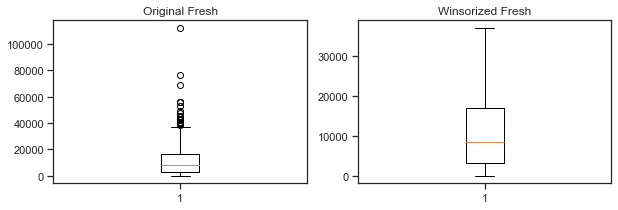

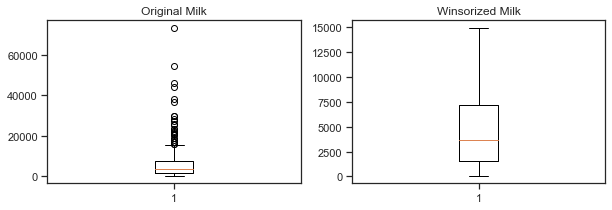

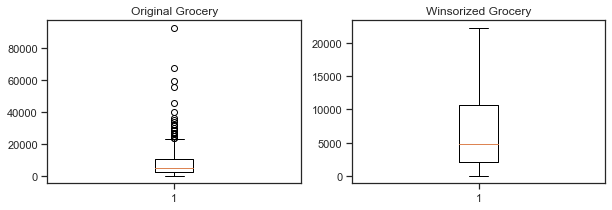

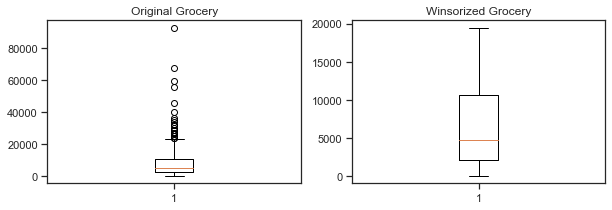

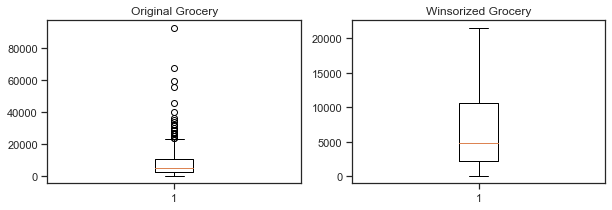

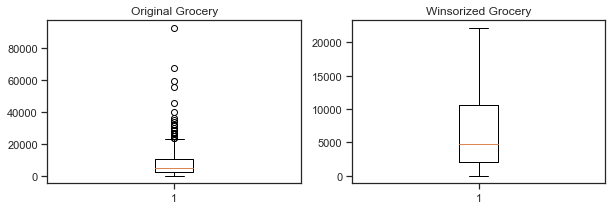

In [26]:
#Using function applying winsorize technique to cap the outliers and adding the new winsorized column to winsor_dict 
# which can be used for futher implementation.
def winsor(col, lower_limit=0, upper_limit=0, show_plot=True):
    
    #Using scipy.stats.mstats.winsorize to each column
    winsor_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    
    #Assigning the winsorized data from each column to  dict
    winsor_dict[col] = winsor_data
    
    #Using box plot, visializing the data to check the outliers before and after winsorizing
    if show_plot == True:
        plt.figure(figsize=(10,3))
        
        #draw plot with original dataset
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('Original {}'.format(col))
        
        #draw plot with winsorized dataset
        plt.subplot(122)
        plt.boxplot(winsor_data)
        
        #assigning titile to the plot
        plt.title('Winsorized {}'.format(col))
        plt.show()


#Creating an empty dict to load all the winsorised data
winsor_dict = {}

#From the analysis found from the box plot, based on the outliers position, 
#various limit has been experimented to limit the outlier count. 

#In boxplot 2 ['Fresh'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[2], upper_limit = 0.0455, show_plot=True)

#In boxplot 3 ['Milk'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[3], upper_limit = 0.067, show_plot=True)

#In boxplot 4 ['grocery'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.06, show_plot=True)

#In boxplot 5 ['Frozen'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.0977, show_plot=True)

#In boxplot 6 ['Detergents_Paper'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.0682, show_plot=True)

#In boxplot 7 ['Delicassen'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.0614, show_plot=True)

**Feature Transformation & Normalization**

After bivariance analysis, we need to transform skewed distribution to normalise the data.

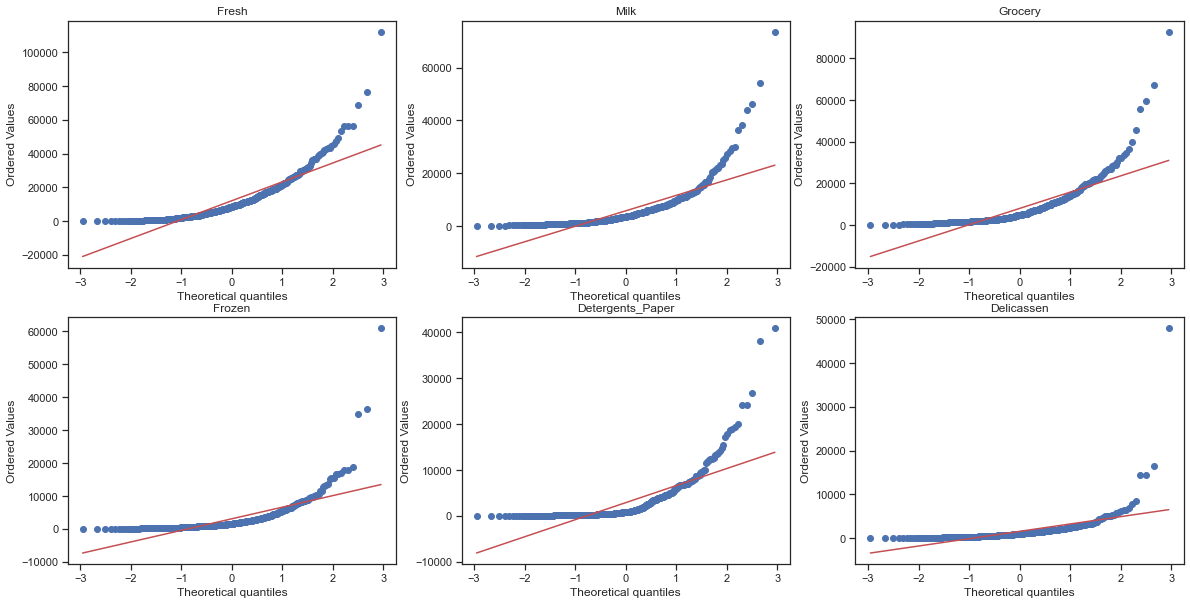

,Statistic,p-value
Fresh,0.781436,7.918286e-24
Milk,0.628334,9.762062e-30
Grocery,0.676231,3.906209e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicassen,0.361068,1.753408e-36


In [27]:
#Let's check the statistical distribution of the variables.
shapiro_test = {}
j=2
plt.figure(figsize=(20, 10))
for i in range(0,6):
    ax = plt.subplot(2,3,i+1)
    probplot(x = df[df.columns[j]], dist=norm, plot=ax)
    plt.title(df.columns[j])
    shapiro_test[df.columns[j]] = shapiro(df[df.columns[j]])
    j += 1
    
plt.show()

pd.DataFrame(shapiro_test, index=['Statistic', 'p-value']).transpose()

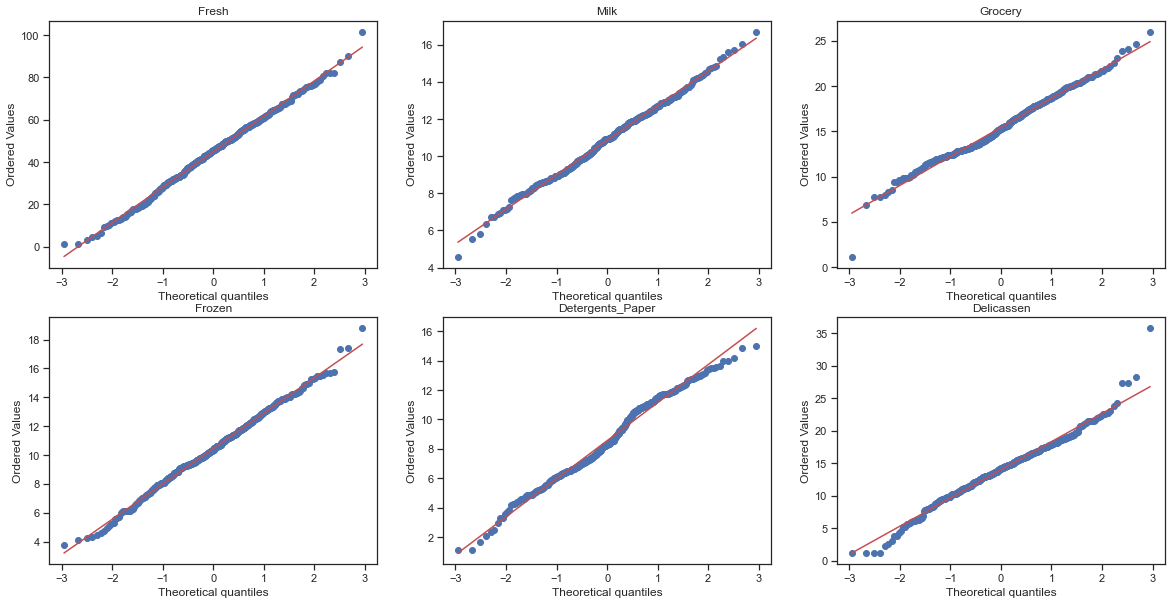

,Statistic,p-value
Fresh,0.997445,0.737682
Milk,0.996949,0.584299
Grocery,0.989161,0.002424
Frozen,0.997237,0.673424
Detergents_Paper,0.985208,0.000185
Delicassen,0.981869,0.000026


In [28]:
#All the variable are statistically non normally distributed.Let's try BoxCox transformation
shapiro_test = {}
lambdas = {}
j=2
plt.figure(figsize=(20, 10))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    x, lbd = boxcox(df[df.columns[j]])
    probplot(x = x, dist=norm, plot=ax)
    plt.title(df.columns[j])
    shapiro_test[df.columns[j]] = shapiro(x)
    lambdas[df.columns[j]] = lbd
    j+=1
    
plt.show()

pd.DataFrame(shapiro_test, index=['Statistic', 'p-value']).transpose()

In [29]:
#Using standard scalaer let's Transform & Normalize the data and visulize it.
sc=StandardScaler()
scaled_data=sc.fit_transform(df)

norm_data=normalize(df)

df=pd.DataFrame(scaled_data,columns=df.columns)
df_SN=pd.DataFrame(norm_data,columns=df.columns)
df_SN.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


We have normalized the dataset. but, here, for modeling purpose for our dataset, it would be better to go without normalization.

# [3] Supervised learning

For supervised learning, 'Channel' is the target variable here. Lets split the dataset.

### - Explore random split of data as test and training set using Python.

In [30]:
#using 5 folds split the data.
skf = KFold(n_splits=5)
for train_index,test_index in skf.split(X_feature, Y_label):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_feature.loc[train_index],X_feature.loc[test_index]
    Y_train, Y_test = Y_label.loc[train_index],Y_label.loc[test_index]

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_label, test_size = 0.3, random_state = 0)

print('{:<15} {:<15} {:<15}'.format('DataSet','Features','Label'))
print('{:<15} {:<15} {:<15}'.format('Train',X_train.shape[0],Y_train.shape[0]))
print('{:<15} {:<15} {:<15}'.format('Test',X_test.shape[0],Y_test.shape[0]))


DataSet         Features        Label          
Train           352             352            
Test            88              88             


### - Use the training data set to train the classification mode.
### - Observe the performance of the model with test data set.
### - Create a confusion matrix to present the result.


Dataframe to store Model Performance Results

In [31]:
# Dataframe to store Model Performance Results
perf_cols = ['Model','Train Accuracy','Test Accuracy','F1-Score','Recall','Precision', 'AUC']
df_perf = pd.DataFrame(columns = perf_cols)

# DataFrame for Confusion matrix
conf_mat_cols = ['Model','False Negatives','False Positives','True Negatives','True Positives']
df_cm = pd.DataFrame(columns = conf_mat_cols)

# DataFrame for cross validation scores
cv_cols = ['Model','Best_Cross_Val_Score']
df_cv = pd.DataFrame(columns = cv_cols)

Function for Model Performance, Confusion Matrix and Classification Report with Plots

In [32]:
# Function to print Confusion Matrix and Classification Report
def model_perf(model, Y_test, Y_predict, algorithm, df_cm, df_perf, ax=None, plot = True):
    # confusion_matrix
    conf_mat = confusion_matrix(Y_test, Y_predict)
    
    # get accuracy of model
    acc_score = accuracy_score(Y_test, Y_predict)
    print(f"Accuracy of {algorithm} for Test data is {acc_score*100}\n")

    # get F1-score of model
    f1score = f1_score(Y_test, Y_predict) 
    print(f"F1-score of {algorithm} for Test data is {f1score*100}\n")
    
    # get the classification report
    class_report = classification_report(Y_test, Y_predict)
    print(f"Classification report for {algorithm} is: \n {class_report}")
    
    # AUC Calculations - false positive rates, true positive rates and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict, pos_label=1)
    
    #area_under_curve
    roc_auc = round(metrics.auc(fpr, tpr)*100,2)
    print(f"AUC for {algorithm}: {roc_auc}\n")
    
    #Train Accuracy score
    train_acc = round(model.score(X_train,Y_train) * 100,2)

    #Test Accuracy score
    test_acc = round(model.score(X_test,Y_test) * 100,2)

    precision,recall,fscore,support = precision_recall_fscore_support(Y_test,Y_predict)

    #Appending into the dataframe
    df_perf = df_perf.append({'Model' : algorithm,'Train Accuracy' : train_acc,'Test Accuracy' : test_acc,
                          'F1-Score' : fscore[1],'Recall' : recall[1], 'Precision' : precision[1], 'AUC' : roc_auc}, ignore_index=True)

    df_cm = df_cm.append({"Model" : algorithm, "True Positives" : conf_mat[1][1], "True Negatives" : conf_mat[0][0],
                      "False Positives" : conf_mat[0][1], "False Negatives" : conf_mat[1][0]}, ignore_index=True, sort=False)

##########################################--PLOT---###########################################
    if plot:
        def conf_plot1(ax = None):
            if ax is None:
                fig, ax = plt.subplots()
            # For label annotations in confusion_matrix
            label_names = ['True -ve','False +ve','False -ve','True +ve']
            label_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]
            labels = [f'{v1}\n{v2}' for v1, v2 in zip(label_names,label_counts)]
            labels = np.asarray(labels).reshape(2,2)

            # Draw heatmap using confusion matrix
            sns.heatmap(conf_mat, cmap = cmap, annot=labels, fmt='')
            ax.set_xlabel('Actual Values')
            ax.set_ylabel('Predicted Values')
            #ax.show()

        #Line plot for ROC curve using fpr and tpr value
        def roc_plot2(ax = None):
            if ax is None:
                fig, ax = plt.subplots()
            ax.plot(fpr, tpr, color='red', label = 'AUC = %0.3f' % roc_auc)  
            ax.set_title('Receiver Operating Characteristic (ROC)')    
            ax.legend(loc = 'lower right')
            ax.plot([0, 1], [0, 1],linestyle='--') #Intersection line
            ax.set_xlabel('False Negative Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_xlim([0,1])
            ax.set_ylim([0,1])
            ax.set_xticks([i for i in np.arange(0,1.1,0.1)])
            ax.set_yticks([i for i in np.arange(0,1.1,0.1)])
        
        prec, rec, thres = precision_recall_curve(Y_test, Y_predict)
        prec, rec, thres = list(prec), list(rec), list(thres)
        prec.pop()
        rec.pop()
            
        def rec_plot3(ax = None):
            if ax is None:
                fig, ax = plt.subplots()
            #Plot Precision-Recall curve
            fig, axis = (None, ax) if ax else plt.subplots()
            axis_twin = axis.twinx()

            #Threshold vs Precision
            sns.lineplot(x = thres, y = prec, label='Precision', ax=axis)
            axis.set_xlabel('Threshold')
            axis.set_ylabel('Precision')
            axis.legend(loc='lower left')

            #Threshold vs Recall
            sns.lineplot(x = thres, y = rec, color='limegreen', label='Recall', ax=axis_twin)
            axis_twin.set_ylabel('Recall')
            axis_twin.set_ylim(0, 1)
            axis_twin.legend(bbox_to_anchor=(0.32, 0.20),loc='lower right')

            axis.set_xlim(0, 1)
            axis.set_ylim(0, 1)
            axis.set_title('Precision Vs Recall')
        
                    
        fig = plt.figure(figsize = (15,4))
        ax1 = fig.add_subplot(1,3,1)
        conf_plot1(ax1)
        ax2 = fig.add_subplot(1,3,2)
        roc_plot2(ax2)
        axis = fig.add_subplot(1,3,3)
        rec_plot3(axis)
    
    
    return df_cm, df_perf

## [3.1] K Neighbors Classifier

Text(0, 0.5, 'Error Value')

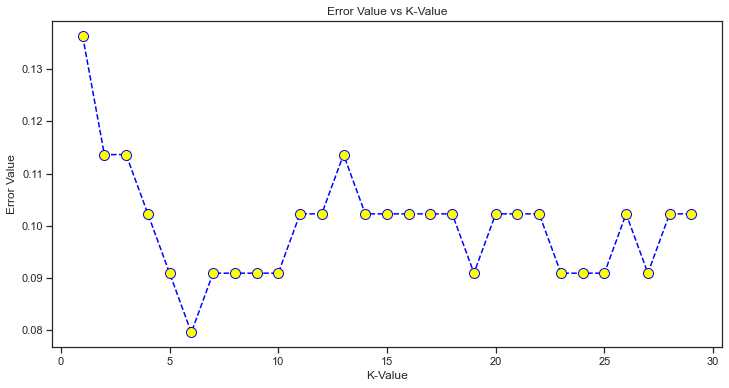

In [33]:
#Choosing K value
error_rate = []

for i in range(1,30):
    KNN_class = KNeighborsClassifier(n_neighbors = i) 
    KNN_class.fit(X_train, Y_train)
    Y_predict = KNN_class.predict(X_test)
    #appending error rate that is not equal to test dataset
    error_rate.append(np.mean(Y_predict != Y_test))
    
#Plotting the plot to check the K value from graph
plt.figure(figsize = (12,6))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'yellow', markersize = 10)
plt.title('Error Value vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Value')   

In [34]:
#As per above graph it seems neig
KNN_class = KNeighborsClassifier(n_neighbors=7)

KNN_class.fit(X_train, Y_train)

Y_predict = KNN_class.predict(X_train)

print("Train Data Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = KNN_class.predict(X_test)

Train Data Model Accuracy: 92.6136


Accuracy of KNN for Test data is 90.9090909090909

F1-score of KNN for Test data is 77.77777777777779

Classification report for KNN is: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.74      0.82      0.78        17

    accuracy                           0.91        88
   macro avg       0.85      0.88      0.86        88
weighted avg       0.91      0.91      0.91        88

AUC for KNN: 87.66



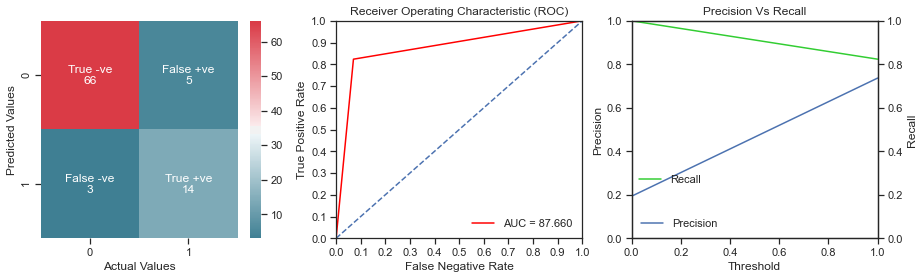

In [35]:
#Draw Model Performace, Confusion Matrix and Classification Report for KNN
df_cm, df_perf = model_perf(KNN_class, Y_test, Y_predict, "KNN", df_cm, df_perf, plot = True)

In [36]:
knn_score = cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv= 3,verbose = True, scoring = 'accuracy')
print("Accuracy for K-Neighbors Classifier using Cross Validation: %0.3f (+/- %0.3f)" 
      % (knn_score.mean(), knn_score.std() * 2))

df_cv = df_cv.append({'Model':'KNeighborsClassifier','Best_Cross_Val_Score':"%0.2f (+/- %0.2f)" 
                      % ((knn_score.mean(), knn_score.std() * 2))},ignore_index=True, sort=False)

Accuracy for K-Neighbors Classifier using Cross Validation: 0.926 (+/- 0.021)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


## [3.2] Support Vector Machines (SVM)

In [37]:
SVM = SVC(kernel='linear')

SVM.fit(X_train, Y_train)

Y_predict = SVM.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = SVM.predict(X_test)

Train Data Model Accuracy: 93.182


Accuracy of SVM for Test data is 89.77272727272727

F1-score of SVM for Test data is 72.72727272727272

Classification report for SVM is: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.75      0.71      0.73        17

    accuracy                           0.90        88
   macro avg       0.84      0.82      0.83        88
weighted avg       0.90      0.90      0.90        88

AUC for SVM: 82.48



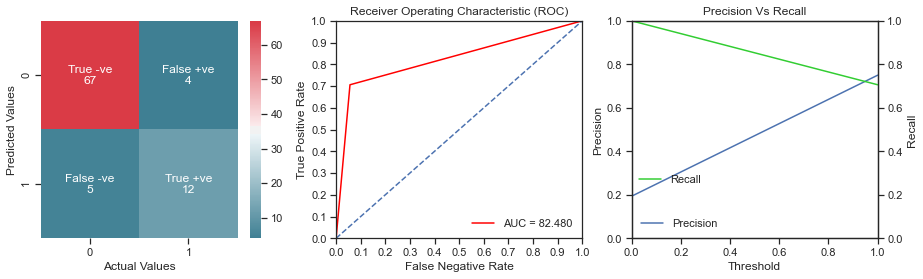

In [38]:
#Draw Model Performace, Confusion Matrix and Classification Report for SVM
df_cm, df_perf = model_perf(SVM, Y_test, Y_predict, "SVM", df_cm, df_perf, plot = True)

In [39]:
svm_score = cross_val_score(SVC(kernel='linear'), X_train, Y_train, cv= 3,verbose = True, scoring = 'accuracy')
print("Accuracy for SVM using Cross Validation: %0.3f (+/- %0.3f)" 
      % (svm_score.mean(), svm_score.std() * 2))

df_cv = df_cv.append({'Model':'SVM','Best_Cross_Val_Score':"%0.2f (+/- %0.2f)" 
                      % ((svm_score.mean(), svm_score.std() * 2))},ignore_index=True, sort=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy for SVM using Cross Validation: 0.915 (+/- 0.001)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s finished


## [3.3] Naive Bayes

In [40]:
GNB = GaussianNB()

GNB.fit(X_train, Y_train)

Y_predict = GNB.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = GNB.predict(X_test)

Train Data Model Accuracy: 92.330


Accuracy of Naive Bayes for Test data is 88.63636363636364

F1-score of Naive Bayes for Test data is 72.22222222222221

Classification report for Naive Bayes is: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.68      0.76      0.72        17

    accuracy                           0.89        88
   macro avg       0.81      0.84      0.83        88
weighted avg       0.89      0.89      0.89        88

AUC for Naive Bayes: 84.01



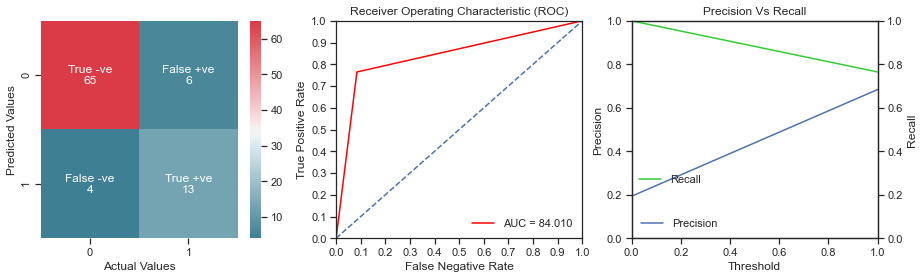

In [41]:
#Draw Model Performace, Confusion Matrix and Classification Report for Naive Bayes
df_cm, df_perf = model_perf(GNB, Y_test, Y_predict, "Naive Bayes", df_cm, df_perf, plot = True)

In [42]:
gnb_score = cross_val_score(GaussianNB(), X_train, Y_train, cv= 3, verbose = True, scoring = 'accuracy')
print("Accuracy for GaussianNB using Cross Validation: %0.3f (+/- %0.3f)" 
      % (gnb_score.mean(), gnb_score.std() * 2))

df_cv = df_cv.append({'Model':'GaussianNB','Best_Cross_Val_Score':"%0.2f (+/- %0.2f)" 
                      % ((gnb_score.mean(), gnb_score.std() * 2))},ignore_index=True, sort=False)

Accuracy for GaussianNB using Cross Validation: 0.915 (+/- 0.001)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


## [3.4] Result Analysis

In [43]:
#Results for All three models comparision
# print('Confusion Matrix of all the models:')
# df_cm

# print('Performance metrics of all the models:')
# df_perf.round(2)

# print('Cross Validation Scores of all the models:')
# df_cv

result = pd.concat([df_perf.round(2), df_cv['Best_Cross_Val_Score'], df_cm.drop('Model', axis=1)], axis=1, sort=False)
result

,Model,Train Accuracy,Test Accuracy,F1-Score,Recall,Precision,AUC,Best_Cross_Val_Score,False Negatives,False Positives,True Negatives,True Positives
0,KNN,92.61,90.91,0.78,0.82,0.74,87.66,0.93 (+/- 0.02),3,5,66,14
1,SVM,93.18,89.77,0.73,0.71,0.75,82.48,0.91 (+/- 0.00),5,4,67,12
2,Naive Bayes,92.33,88.64,0.72,0.76,0.68,84.01,0.91 (+/- 0.00),4,6,65,13


# [4] Unsupervised learning

For using K-Means algorithm. Let's determine the optimal value of clusters here.

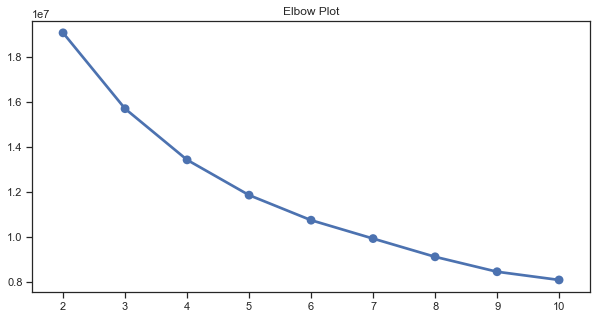

In [44]:
#As we already have our scaled data ready, lets do principle component analysis
#and print elbow plot to determine the optimal number of clusters.

PCA_train = PCA(2).fit_transform(scaled_data)
ps = pd.DataFrame(PCA_train)

le = {}
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=123)
    Y_label = kmeans.fit_predict(X_feature)
    le[k] = kmeans.inertia_
   
plt.figure(figsize=(10,5))
plt.title('Elbow Plot')
sns.pointplot(x = list(le.keys()), y = list(le.values()))

plt.show()

Here, we can try 3, 4 or 5 clusters as per above. strong declination plot.

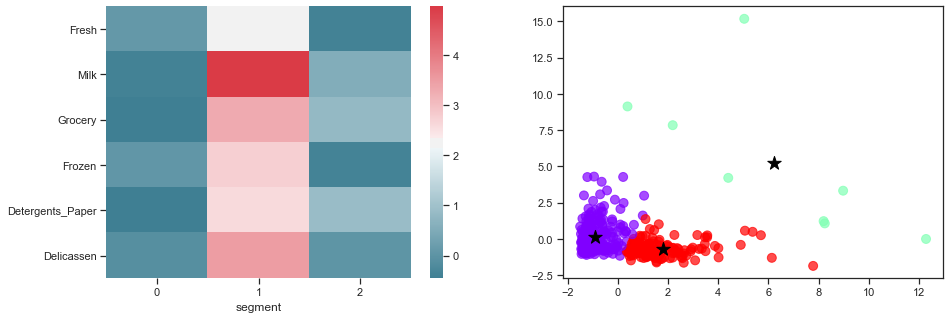

In [45]:
#Let's parallely plot the heatmap and scatter plot to see the segmentation
#Cluster=3
kmeans = KMeans(n_clusters=3, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = df.assign(segment = kmeans.labels_)
kmeans_3_means = df.drop(['Channel','Region'], axis=1).groupby('segment').mean()

lab = kmeans.labels_

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1,2,2)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, cmap='rainbow',alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black', s=200)

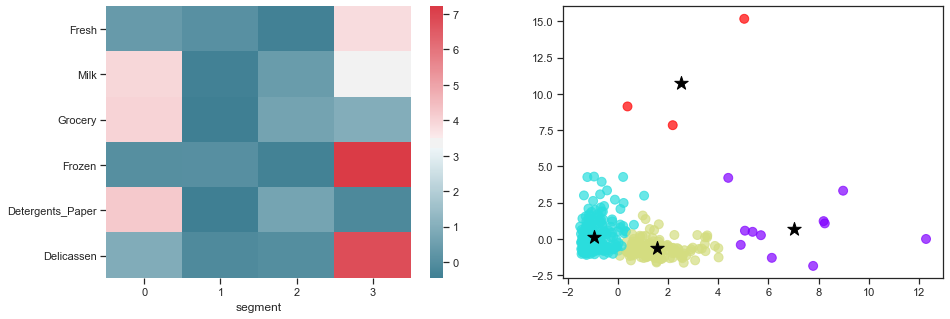

In [46]:
#Let's parallely plot the heatmap and scatter plot to see the segmentation
#Cluster=4
kmeans = KMeans(n_clusters=4, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = df.assign(segment = kmeans.labels_)
kmeans_3_means = df.drop(['Channel','Region'], axis=1).groupby('segment').mean()

lab = kmeans.labels_

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1,2,2)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, cmap='rainbow',alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black', s=200)

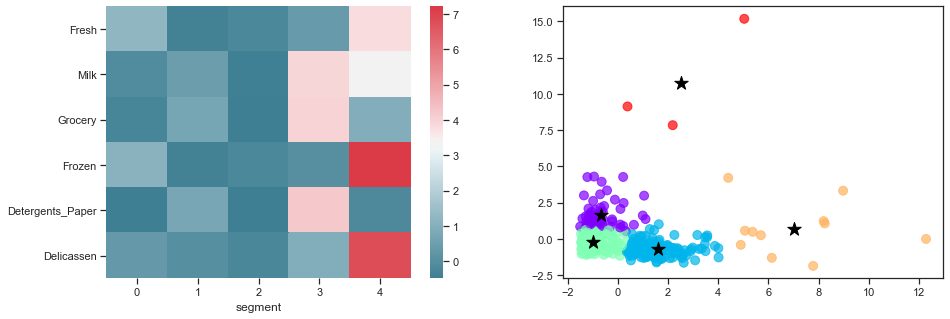

In [47]:
#Let's parallely plot the heatmap and scatter plot to see the segmentation
#Cluster=5
kmeans = KMeans(n_clusters=5, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = df.assign(segment = kmeans.labels_)
kmeans_3_means = df.drop(['Channel','Region'], axis=1).groupby('segment').mean()

lab = kmeans.labels_

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1,2,2)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, cmap='rainbow',alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black', s=200)

Let's try other kind of clustering.

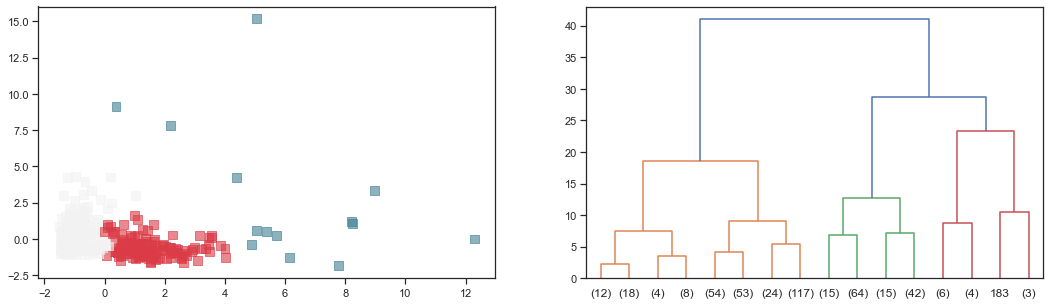

In [48]:
#Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_agc_pred = agc.fit_predict(ps)
plt.figure(figsize =(18,5))

plt.subplot(1,2,1)
plt.scatter(ps[0], ps[1],c = y_agc_pred, s=80, cmap=cmap,alpha=0.6,marker='s')

plt.subplot(1,2,2)
dend=shc.dendrogram(shc.linkage(ps,method='ward') ,truncate_mode='level', p=3) 
plt.show()


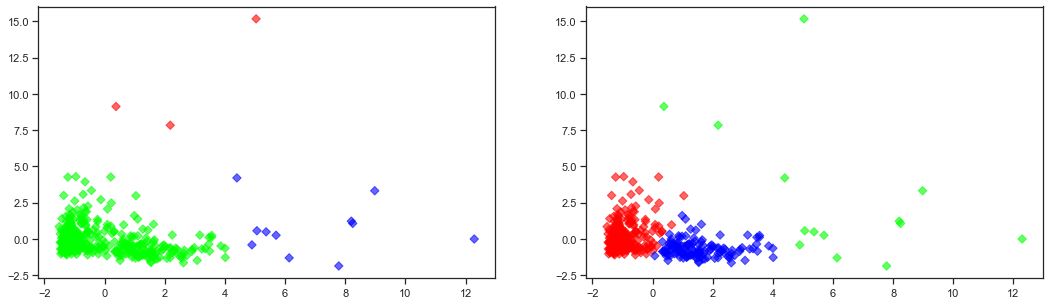

In [49]:
#Birch clustering
brc = Birch(branching_factor=500, n_clusters=3, threshold=1.5)
brc.fit(ps)
labels = brc.predict(ps)
plt.figure(figsize =(18,5))

plt.subplot(1,2,1)
plt.scatter(ps[0], ps[1], c=labels, cmap='brg',alpha=0.6,marker='D')

#MiniBatchKMeans
mb = MiniBatchKMeans(n_clusters=3, random_state=0)
mb.fit(ps)
labels = mb.predict(ps)

plt.subplot(1,2,2)
plt.scatter(ps[0], ps[1], c=labels, cmap='brg',alpha=0.6,marker='D')


plt.show()

In [50]:
end = time. time()
sec = (end - start)
print(f'Total time taken to complete the execution :{sec} seconds(s)')

Total time taken to complete the execution :34.90898942947388 seconds(s)
